In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from sklearn.model_selection import train_test_split
from sksurv.datasets import load_breast_cancer
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder


In [2]:
X, y = load_breast_cancer()
Xt = OneHotEncoder().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.25, random_state=0)

In [7]:
y_train

array([( True, 1731.), (False, 5238.), (False, 5860.), ( True, 7185.),
       ( True, 1171.), (False, 4675.), (False, 5035.), (False, 5651.),
       (False, 5101.), (False, 4555.), (False, 6135.), (False, 3900.),
       (False, 5693.), (False, 5551.), ( True, 1693.), (False, 4691.),
       (False, 6295.), (False, 5612.), (False, 6132.), (False, 4672.),
       (False, 4487.), (False, 4952.), (False, 6298.), (False, 4874.),
       (False, 4866.), (False, 2647.), ( True,  690.), (False, 5571.),
       (False, 5359.), (False, 2225.), (False, 1215.), (False, 5673.),
       (False, 1920.), (False, 5316.), ( True,  524.), (False, 3555.),
       (False, 5530.), (False, 1781.), (False, 5685.), ( True, 1136.),
       (False, 4181.), ( True, 1721.), (False, 2879.), ( True, 1598.),
       (False, 5779.), ( True,  289.), (False, 4681.), (False, 4568.),
       (False, 5768.), ( True, 2454.), ( True,  421.), ( True,  723.),
       (False, 2965.), ( True,  269.), (False, 4596.), (False, 5012.),
      

In [3]:
est_cph_tree = GradientBoostingSurvivalAnalysis(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
est_cph_tree.fit(X_train, y_train)
cindex = est_cph_tree.score(X_test, y_test)
print(round(cindex, 3))

0.756


In [4]:
scores_cph_tree = {}

est_cph_tree = GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=1, random_state=0)
for i in range(1, 31):
    n_estimators = i * 5
    est_cph_tree.set_params(n_estimators=n_estimators)
    est_cph_tree.fit(X_train, y_train)
    scores_cph_tree[n_estimators] = est_cph_tree.score(X_test, y_test)

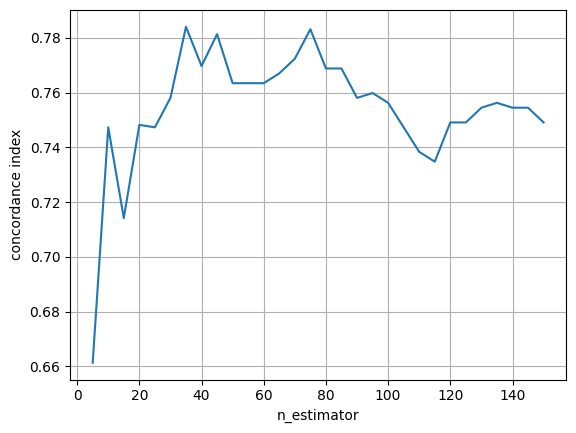

In [5]:
x, y = zip(*scores_cph_tree.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

In [22]:
data = pd.read_csv('/media/andrey/HDD/ods_data_fusion_2024/models/data_from_0010.csv')
data.head()

,user_id,employee_count_nm,customer_age,count_trans_dates,msumm3,count_trans_transaction_amt_sum,mccc0,msumm4,mcc0,count_trans_date_max,...,"smc(8, 1)",mccc15,msump4,spc5,mcc34,mcc4,spc6,msump6,spc4,mcc110
0,3,4.0,3,106,0.000000,13706.416641,7,0.000000,186108.229797,2022-05-14,...,0,0,43075.747864,2,0.0,0.000000,1,0.000000,3,0.0
1,9,6.0,3,181,-13289.485764,-323434.666813,0,-104223.187939,0.000000,2022-04-19,...,9,4,0.000000,9,0.0,-1664.872650,23,0.000000,15,0.0
2,13,5.0,2,168,-16394.193359,-124717.379150,0,-27095.248047,0.000000,2022-09-07,...,3,0,10952.112305,2,0.0,0.000000,6,86198.161377,3,0.0
3,37,6.0,2,179,-32719.820328,-331859.599463,2,-41364.700729,10738.788574,2022-08-17,...,37,2,0.000000,67,0.0,-126.869576,54,5251.647949,77,0.0
4,41,4.0,2,153,-8045.445801,-108586.614166,0,-17708.008820,0.000000,2022-04-18,...,1,1,0.000000,3,0.0,0.000000,4,0.000000,4,0.0


In [23]:
PATH = '../data/'
train_data = pd.read_csv(PATH + 'train.csv')
data = data.merge(train_data, on="user_id", how="left")
data.drop('count_trans_date_max', axis=1,inplace=True)

In [28]:
data.fillna(0, inplace=True)

In [29]:
data_train = data[data['target'].notna()]
data_test = data[data['target'].isna()]

In [30]:
X = data_train.iloc[:,1:-2]
X

,employee_count_nm,customer_age,count_trans_dates,msumm3,count_trans_transaction_amt_sum,mccc0,msumm4,mcc0,mcc12,mcc155,...,"smc(8, 1)",mccc15,msump4,spc5,mcc34,mcc4,spc6,msump6,spc4,mcc110
0,4.0,3,106,0.000000,13706.416641,7,0.000000,186108.229797,0.000000,0.000000,...,0,0,43075.747864,2,0.000000,0.000000,1,0.000000,3,0.000000
1,6.0,3,181,-13289.485764,-323434.666813,0,-104223.187939,0.000000,0.000000,0.000000,...,9,4,0.000000,9,0.000000,-1664.872650,23,0.000000,15,0.000000
2,5.0,2,168,-16394.193359,-124717.379150,0,-27095.248047,0.000000,31293.108643,0.000000,...,3,0,10952.112305,2,0.000000,0.000000,6,86198.161377,3,0.000000
3,6.0,2,179,-32719.820328,-331859.599463,2,-41364.700729,10738.788574,0.000000,-2251.359375,...,37,2,0.000000,67,0.000000,-126.869576,54,5251.647949,77,0.000000
4,4.0,2,153,-8045.445801,-108586.614166,0,-17708.008820,0.000000,0.000000,0.000000,...,1,1,0.000000,3,0.000000,0.000000,4,0.000000,4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95995,0.0,2,124,0.000000,-29581.256115,0,-142.056610,0.000000,0.000000,0.000000,...,4,1,0.000000,0,0.000000,0.000000,5,0.000000,1,0.000000
95996,0.0,1,179,-10452.779190,-40491.908630,30,-7546.495855,-10868.047920,0.000000,-1563.939163,...,23,0,0.000000,33,0.000000,-129.403091,20,0.000000,29,-49.125139
95997,0.0,0,158,0.000000,-18537.821270,0,-2644.634823,0.000000,0.000000,-6259.677155,...,14,0,0.000000,5,0.000000,-1372.377075,6,0.000000,10,0.000000
95998,0.0,2,175,-20904.990967,-164004.761685,19,-12082.776123,34391.163893,0.000000,0.000000,...,28,0,5607.572266,10,0.000000,0.000000,20,4826.499023,5,0.000000


In [33]:
y = data_train[['target','time']].values

#List of tuples
aux = [(e1,e2) for e1,e2 in y]
y = np.array(aux, dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

est_cph_tree = GradientBoostingSurvivalAnalysis(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
est_cph_tree.fit(X_train, y_train)
cindex = est_cph_tree.score(X_test, y_test)
print(round(cindex, 3))

KeyboardInterrupt: 

In [18]:
X_train

,X200726_at,X200965_s_at,X201068_s_at,X201091_s_at,X201288_at,X201368_at,X201663_s_at,X201664_at,X202239_at,X202240_at,...,X221816_s_at,X221882_s_at,X221916_at,X221928_at,age,er=positive,grade=intermediate,grade=poorly differentiated,grade=unkown,size
98,11.724672,10.239977,11.607358,10.477074,11.541657,11.805007,10.332081,10.696279,10.482810,7.263134,...,10.870207,8.329697,6.354410,6.791620,54.0,1.0,1.0,0.0,0.0,1.8
55,11.464257,10.064804,12.119238,10.024242,11.484064,10.751808,8.606080,9.165251,10.850203,6.900934,...,11.356340,10.203149,2.699639,4.003497,39.0,1.0,1.0,0.0,0.0,2.2
144,11.607331,10.968753,11.908812,9.313081,12.295450,12.322144,8.219652,9.532789,10.125345,5.264898,...,11.201026,8.683087,5.203122,8.272061,42.0,1.0,1.0,0.0,0.0,2.0
162,11.520200,10.756028,11.737092,10.347944,12.253915,12.032061,8.558974,9.623119,10.614994,7.777835,...,10.760633,9.351893,6.861840,7.279310,41.0,1.0,1.0,0.0,0.0,2.2
24,12.097690,10.064534,12.686969,10.235970,13.068936,11.763283,10.374941,11.134875,10.364218,8.239589,...,11.321943,8.509915,6.501129,6.351634,58.0,0.0,0.0,1.0,0.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,11.937726,10.508739,12.529369,10.881369,11.977837,11.202854,8.534262,9.615729,8.977693,6.455034,...,10.887703,9.025959,8.295619,5.102110,51.0,1.0,1.0,0.0,0.0,1.8
192,11.957850,10.661887,12.150965,10.355328,12.302234,11.748140,9.612908,10.562328,9.615672,5.039777,...,11.022337,8.388652,5.539609,7.130598,45.0,1.0,1.0,0.0,0.0,1.7
117,11.875805,10.511450,11.898012,10.043495,13.132027,12.650085,9.673196,10.147263,10.150404,7.140350,...,11.299949,8.923420,6.280042,7.677774,56.0,1.0,1.0,0.0,0.0,1.0
47,12.009155,10.372492,11.843353,9.789078,11.146634,11.394011,8.435451,8.895532,10.101997,5.100260,...,10.549487,9.628356,6.388987,7.449108,38.0,1.0,0.0,0.0,0.0,3.5
